# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [362]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [363]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [364]:
#  1. Get the total rides for each city type
ride_count_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
ride_count_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [365]:
# 2. Get the total drivers for each city type
total_drivers_by_type = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_by_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [366]:
#  3. Get the total amount of fares for each city type
total_fare_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fare_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [367]:
#  4. Get the average fare per ride for each city type. 
avg_fare_by_type =  pyber_data_df.groupby(["type"]).mean()["fare"]
avg_fare_by_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [368]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver = total_fare_by_type / total_drivers_by_type
avg_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [369]:
#  6. Create a PyBer summary DataFrame. 
ride_summary = {'Total Rides': ride_count_by_type, 'Total Drivers': total_drivers_by_type, 'Total Fares': total_fare_by_type,
          'Average Fare per Ride': avg_fare_by_type, 'Average Fare per Driver': avg_fare_per_driver}

pyber_summary_df = pd.DataFrame(ride_summary)

pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [370]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [371]:
#  8. Format the columns.

pyber_summary_df['Total Fares'] = pyber_summary_df['Total Fares'].map("${:.2f}".format)
pyber_summary_df['Average Fare per Ride'] = pyber_summary_df['Average Fare per Ride'].map("${:.2f}".format)
pyber_summary_df['Average Fare per Driver'] = pyber_summary_df['Average Fare per Driver'].map("${:.2f}".format)

pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,$4327.93,$34.62,$55.49
Suburban,625,490,$19356.33,$30.97,$39.50
Urban,1625,2405,$39854.38,$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [372]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [373]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
pyber_groupby_type_date_df = pyber_data_df.groupby(["type","date"]).sum()["fare"]
pyber_groupby_type_date_df.head()

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
Name: fare, dtype: float64

In [374]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
pyber_groupby_type_date_df = pyber_groupby_type_date_df.reset_index()
pyber_groupby_type_date_df.head()

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33


In [375]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pyber_pivot_df = pyber_groupby_type_date_df.pivot(index="date",columns="type",values="fare")
# print (pyber_pivot_df.index.max())
pyber_pivot_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [376]:
# 5 Check data type of index.  Currently object.
pyber_pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2375 entries, 2019-01-01 00:08:16 to 2019-05-08 13:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  625 non-null    float64
 2   Urban     1625 non-null   float64
dtypes: float64(3)
memory usage: 74.2+ KB


In [377]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
pyber_pivot_df.index = pd.to_datetime(pyber_pivot_df.index)

# 7. Check that the datatype for the index is datetime using df.info()
# df.index = pd.to_datetime(df.index)
# Change index type to datetime
pyber_pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-01 00:08:16 to 2019-05-08 13:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  625 non-null    float64
 2   Urban     1625 non-null   float64
dtypes: float64(3)
memory usage: 74.2 KB


In [378]:
# 8. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
# Filter date range of dataframe down to 1/1/2019 to 4/29/2019 (remove May)
pyber_pivot_by_day_May_Removed_df = pyber_pivot_by_day_df.loc['2019-01-01':'2019-04-29']

# Check max date of each dataframe
print (pyber_pivot_by_day_df.index.max())
print (pyber_pivot_by_day_May_Removed_df.index.max())

2019-04-29 00:00:00
2019-04-29 00:00:00


In [379]:
# 9. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
# Re-calculate sums by using resample by Day "D" and by "W"
pyber_pivot_by_day_df = pyber_pivot_by_day_May_Removed_df.resample("D").sum()
pyber_pivot_by_week_df = pyber_pivot_by_day_May_Removed_df.resample("W").sum()
pyber_pivot_by_week_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


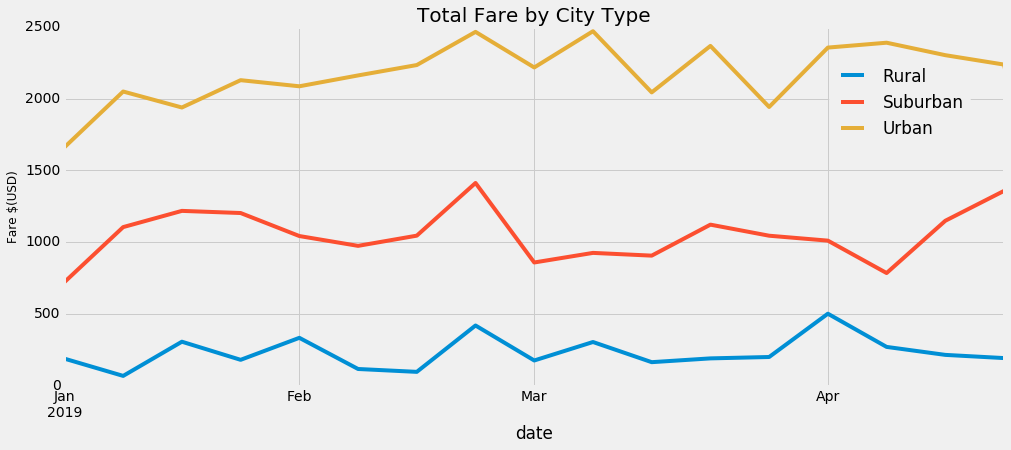

In [380]:
# 10. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(15, 6))
pyber_pivot_by_week_df.reset_index().plot(x='date',y='Rural', ax=ax)
pyber_pivot_by_week_df.reset_index().plot(x='date',y='Suburban', ax=ax)
pyber_pivot_by_week_df.reset_index().plot(x='date',y='Urban', ax=ax)
plt.title("Total Fare by City Type", fontsize=20)
plt.ylabel("Fare $(USD)", fontsize=12)
ax.set_xlim('2019-01-01','2019-04-28')
plt.legend(loc='upper right', borderaxespad=2.)
plt.savefig("analysis/PyBer_fare_summary.png")
plt.show()